## Chapter 5

### LIME and SHAP
#### Here we will look at Perturbation methods, LIME for a CNN model

##### We will look at Local interpretability provided for individual predictions 

We will be observing and interpreting the models using post hoc method 
LIME (Local Interpretable Model-Agnotic Explanations)

We use the AI-Lab-Makerere/beans dataset from huggingface <br>

We are using the huggingface beans dataset. More details on the dataset can be found here <br>
https://huggingface.co/datasets/AI-Lab-Makerere/beans

Class Labels are <br>

  "angular_leaf_spot": 0 <br>
  "bean_rust": 1 <br>
  "healthy": 2

**Install the required libraries**

In [ ]:
!pip install tensorflow

In [15]:
!pip show tensorflow
!pip show keras

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\achakkirala\appdata\local\miniconda3\envs\env-02\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Name: keras
Version: 3.3.3
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: c:\users\achakkirala\appdata\local\miniconda3\envs\env-02\lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow-intel


**Import the libraries and load the huggingface dataset**

In [5]:
# Step 1: Load the Dataset
from datasets import load_dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from skimage import img_as_float
from skimage.transform import resize
import numpy as np
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
import matplotlib.pyplot as plt


dataset = load_dataset("AI-Lab-Makerere/beans")




**Preprocess the images to numpy and resize the training, test data**

In [7]:
# Step 2: Preprocess the Data
def process_images(images):
    return np.array([resize(image, (128, 128)) for image in images])


def preprocess_images(images):
    # Convert images to numpy arrays and resize
    return np.array([resize(img_as_float(image), (128, 128)) for image in images])

train_images = preprocess_images(dataset['train']['image'])
test_images = preprocess_images(dataset['test']['image'])
train_labels = np.array(dataset['train']['labels'])
test_labels = np.array(dataset['test']['labels'])

**Build with the CNN model with Sequential architecture, train mode using Adam optimizer and the loss function as sparse categorical crossentropy**

In [8]:
# Step 3: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.3967 - loss: 1.9966 - val_accuracy: 0.0000e+00 - val_loss: 2.2477
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.5289 - loss: 0.9227 - val_accuracy: 0.6039 - val_loss: 1.1036
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.6984 - loss: 0.6971 - val_accuracy: 0.5942 - val_loss: 1.1645
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.7644 - loss: 0.5484 - val_accuracy: 0.4831 - val_loss: 1.6762
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.8485 - loss: 0.4001 - val_accuracy: 0.4734 - val_loss: 1.6671
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.8813 - loss: 0.3025 - val_accuracy: 0.6570 - val_loss: 1.2014
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.8878 - loss: 0.3068 - val_accuracy: 0.3092 - val_loss: 3.1968
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.9528 - loss: 0.1782 - val_accuracy

**Load unseen image, preprocess it and run model predcition on the image**

In [18]:
# Step 5: Test the Model
model.evaluate(test_images, test_labels)

# Load a new image, preprocess it, and make a prediction
new_image = preprocess_images([plt.imread('testleaf.jpeg')])
prediction = model.predict(new_image)
print("Prediction:", prediction)

classfound  = np.argmax(prediction, axis=-1)

print("Class:", classfound)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7469 - loss: 0.8427
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: [[5.9212554e-01 4.0786180e-01 1.2739323e-05]]
Class: [0]


The image is identified with class 0: disease angular leaf spot.

**Instantiate the LIME Image Explainer and run the explainer on the unseen test data**

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

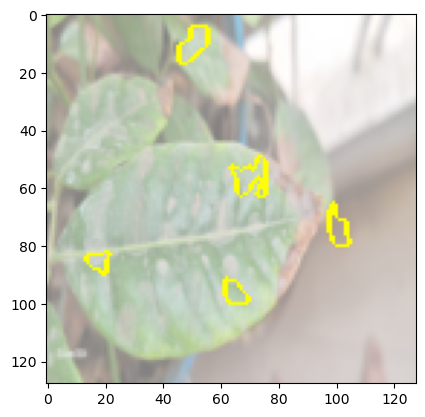

In [16]:
from skimage.segmentation import mark_boundaries

# Step 6: Interpretability with LIME
explainer = lime_image.LimeImageExplainer()
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)
explanation = explainer.explain_instance(new_image[0], model.predict, top_labels=5, hide_color=0, num_samples=1000, segmentation_fn=segmenter)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

The explanations on the image are identifying some of the spots on the leaf but in addition the brownish background is also mistaken for the leaf disease. This is useful information in understanding the model and take action like retraining the model, adding more training sets, checking class imbalance. Or the model itself may require further evaluation.